In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Huts dataset

In [2]:
index = 7

In [3]:
huts = cv2.imread("./data/single_buildings/building_mask_%d.png" % index)

In [4]:
with open('./data/single_buildings/building_coords.csv') as f:
    all_coords = f.readlines()
all_coords = [x.strip().split(',')[1:] for x in all_coords]

In [5]:
coords = all_coords[index]
coords = [float(x) for x in coords]

In [6]:
coords_x = coords[0::2]

In [7]:
coords_y = coords[1::2]

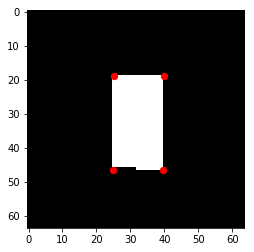

In [8]:
plt.imshow(huts)
plt.scatter(coords_x, coords_y, c = 'r', s = 40)
plt.show()

## Inira dataset

In [9]:
image = cv2.imread('./data/AerialImageDataset/train/gt/austin10.tif')

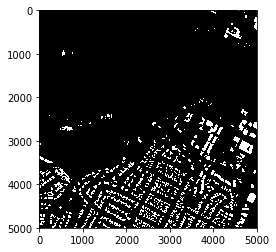

In [10]:
plt.imshow(image)
plt.show()

In [11]:
img = image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#find Harris corners
gray = np.float32(gray)

dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
dst = np.uint8(dst)

#find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

#define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
#here u can get corners
print (corners)

#Now draw them
# res = np.hstack((centroids,corners)) 
# res = np.int0(res) 
# img[res[:,1],res[:,0]]=[0,0,255] 
# img[res[:,3],res[:,2]] = [0,255,0]
# cv2.imwrite('1.png',img)

[[ 2.4987590e+03  2.4929893e+03]
 [ 3.8456655e+03  2.2376995e-01]
 [ 4.0115996e+03 -7.5279810e-02]
 ...
 [ 3.7423843e+03  4.9990771e+03]
 [ 3.7783599e+03  4.9990806e+03]
 [ 3.7856497e+03  4.9987891e+03]]


In [12]:
# fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
# plt.figure(figsize=(8,8))
# plt.imshow(image)
# plt.scatter(corners[1:,0],corners[1:,1], c = 'r', s = 2)
# fig.savefig('processed_corners.')   # save the figure to file
# plt.close(fig)    # close the figure

### Detecting boundary corners of each individual building

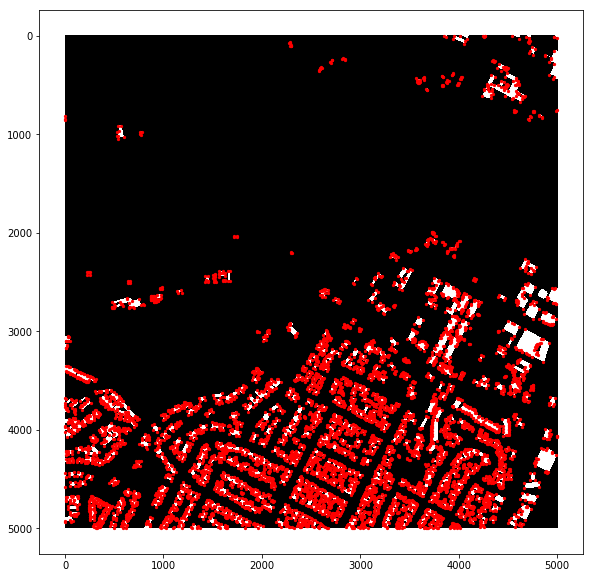

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.scatter(corners[1:,0],corners[1:,1], c = 'r', s = 5)
plt.savefig('./processed.png')

# Instance segmentation using contour plots.

In [14]:
image = cv2.imread('./data/AerialImageDataset/train/gt/austin10.tif')

In [15]:
img = np.copy(image[4500:5000,0:500]) #Image matrix

In [16]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Convert any colors to B/W

#find contour levels.
ret, thresh = cv2.threshold(gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_TC89_KCOS)
output = 5
contours2 = cv2.approxPolyDP(contours[2], 2, True)


# #Harrison corner detection plots. 
# gray = np.float32(gray)

# dst = cv2.cornerHarris(gray,2,3,0.04)
# dst = cv2.dilate(dst,None)
# ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
# dst = np.uint8(dst)

# #find centroids
# ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# #define the criteria to stop and refine the corners
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
# corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# #here u can get corners
# print (corners)


In [17]:
print(contours2)

[[[342 423]]

 [[333 433]]

 [[333 443]]

 [[329 450]]

 [[343 458]]

 [[341 461]]

 [[362 473]]

 [[371 456]]

 [[366 449]]

 [[370 447]]

 [[377 451]]

 [[382 441]]]


In [18]:
print(hierarchy[0])

[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [ 3  1 -1 -1]
 [ 4  2 -1 -1]
 [ 5  3 -1 -1]
 [ 6  4 -1 -1]
 [ 7  5 -1 -1]
 [ 8  6 -1 -1]
 [ 9  7 -1 -1]
 [10  8 -1 -1]
 [11  9 -1 -1]
 [12 10 -1 -1]
 [13 11 -1 -1]
 [14 12 -1 -1]
 [15 13 -1 -1]
 [16 14 -1 -1]
 [17 15 -1 -1]
 [18 16 -1 -1]
 [19 17 -1 -1]
 [20 18 -1 -1]
 [21 19 -1 -1]
 [22 20 -1 -1]
 [23 21 -1 -1]
 [24 22 -1 -1]
 [25 23 -1 -1]
 [26 24 -1 -1]
 [-1 25 -1 -1]]


In [19]:
print(contours[2].shape)

(39, 1, 2)


In [20]:
print(img[0:1000,400:600].shape)

(500, 100, 3)


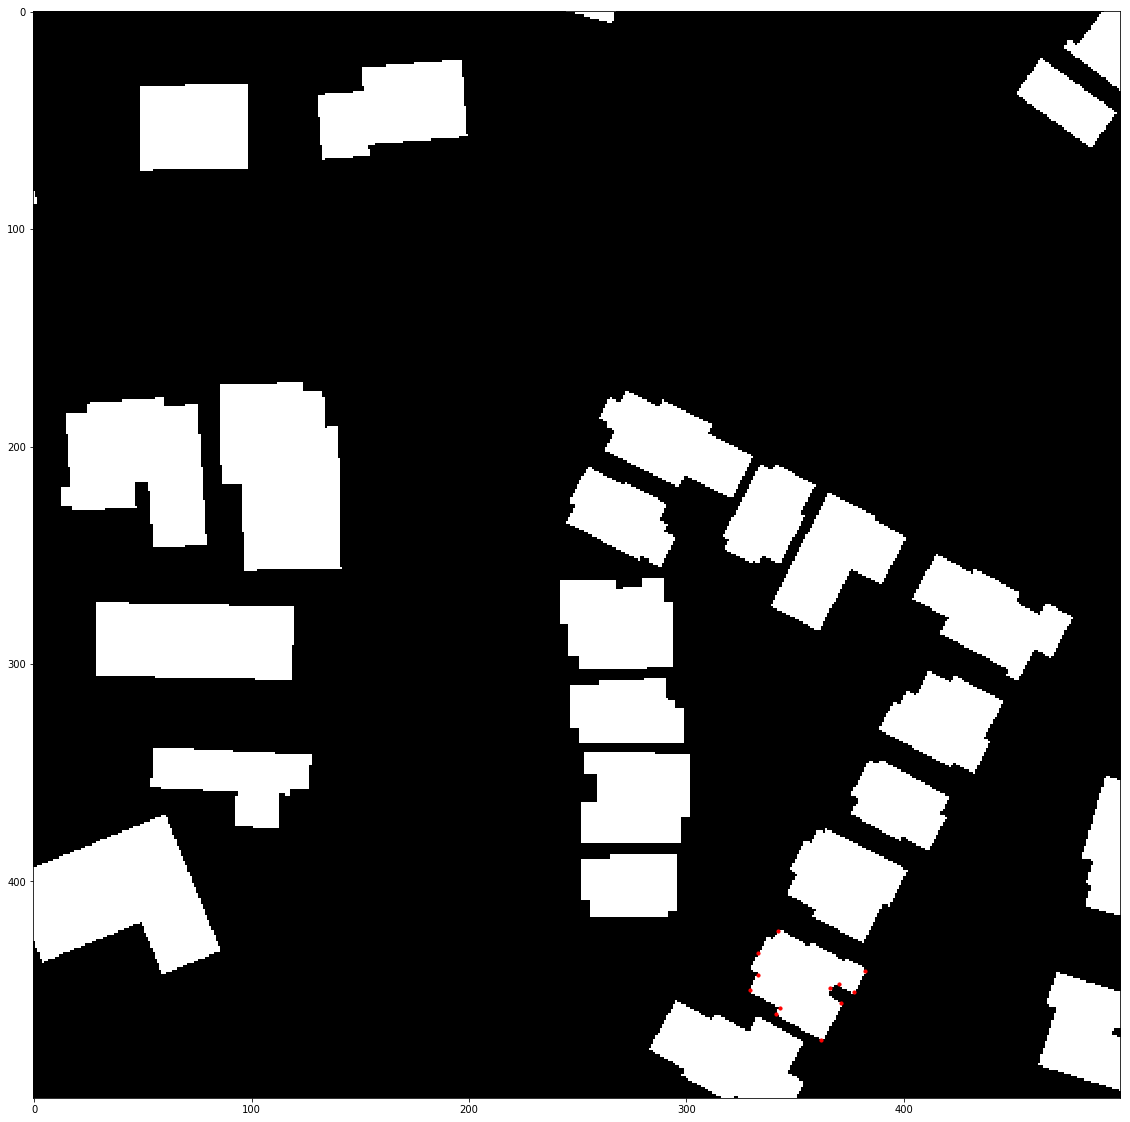

In [21]:
plt.figure(figsize=(20,20))
plt.imshow(img)
for plot in contours2:
    plt.scatter(plot[0][0], plot[0][1], c='r', s=10)
# plt.scatter(corners[1:,0],corners[1:,1], c = 'r', s = 5)
plt.savefig('./processed.png')

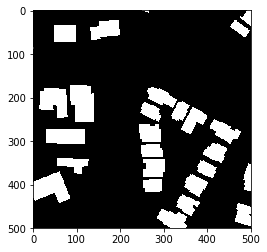

In [22]:
plt.imshow(img,cmap='gray')

# Selecting individual buildings from the mask. 

In [23]:
#Given the city mask, the below code segments the dataset to individual buildings
#It also detects edge corners and produces a outline of the building
#Each building is also displayed from the original satelite image

In [24]:
imageName = 'austin10'

In [25]:
mskImage = cv2.imread('./data/AerialImageDataset/train/gt/'+imageName+'.tif') #These are the ground gt
satImage = cv2.imread('./data/AerialImageDataset/train/images/'+imageName+'.tif') #These are the training images,

In [26]:
#Image dimensions used when validating.
image_x = mskImage.shape[0]
image_y = mskImage.shape[1]
print(image_x, image_y)

5000 5000


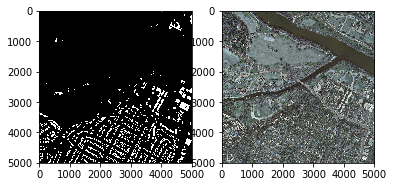

In [27]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(mskImage)
axarr[1].imshow(satImage)

In [28]:
#Corner detection
gray = cv2.cvtColor(mskImage,cv2.COLOR_BGR2GRAY) #Convert any colors to B/W
ret, thresh = cv2.threshold(gray, 127, 255, 0) #The threshold of our mask.
#Threshold of detection. RETR_EXTERNAL = Use only outer layer. Chaining with TC_KCOS
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_TC89_KCOS)

In [29]:
#Smoothing of each detected object to reduce number of unwanted points
smoothContours = []
for building in contours:
    smoothed = cv2.approxPolyDP(building, 2, True)
    smoothed = smoothed.squeeze() #Reduce dim to x, y.
    smoothContours.append(smoothed)

In [30]:
#Check if building after cropped out is part of the sattelite image.
def checkValid(buildingArray, margin):
    max_x = max(buildingArray[:,0])
    max_y = max(buildingArray[:,1])
    min_x = min(buildingArray[:,0])
    min_y = min(buildingArray[:,1])
    if (max_x + margin) > image_x or (min_x - margin) < 0 :
        return(False)
    elif (max_y + margin) > image_y or (min_y - margin) < 0:
        return(False)
    else:
        return(True)

In [47]:
def generateDataBuilding(buildingArray, image, margin, identifier, showPlot=False):
    buildingArray = np.copy(buildingArray)
    
    #Check if this building can be plotted
    if checkValid(buildingArray, margin) == False:
        print("Coordinates not valid")
        print(buildingArray)
        return

    max_x = max(buildingArray[:,0])
    min_x = min(buildingArray[:,0])
    max_y = max(buildingArray[:,1])
    min_y = min(buildingArray[:,1])
    
    #Reshape the points to correspond to crop offset. 
    for i in range(buildingArray.shape[0]):
        buildingArray[i][0] -= (min_x-margin)
        buildingArray[i][1] -= (min_y-margin)
        
    #Save our bounding box coordinates. 
    #The coordinate order is the correct path to trace the bbox.
    print('./data/genTrain/'+imageName+'/'+identifier+'.txt')
    with open('./data/genTrain/'+imageName+'/'+identifier+'.txt','w') as filetowrite:
        for line in buildingArray:
            filetowrite.write(str(line[0])+" "+str(line[1])+"\n")
        filetowrite.close()
    
    #Plot figure and our corner points
    fig = plt.figure(figsize=(4,4), frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    
    ax.imshow(image[min_y-margin:max_y+margin,min_x-margin:max_x+margin], origin='lower')
    ax.scatter(buildingArray[:,0], buildingArray[:,1], c='r', s=10)
    fig.savefig('./data/genTrain/'+imageName+'/'+identifier+'.png');
    
    #Don't show plot
    if showPlot == False:
        plt.close(fig)

#     plt.figure(figsize=(4,4))
#     plt.imshow(image[min_y-margin:max_y+margin,min_x-margin:max_x+margin], origin='lower')
#     plt.scatter(buildingArray[:,0], buildingArray[:,1], c='r', s=10)
#     plt.savefig('./data/genTrain/'+imageName+'/'+identifier+'.png');


./data/genTrain/austin10/854.txt


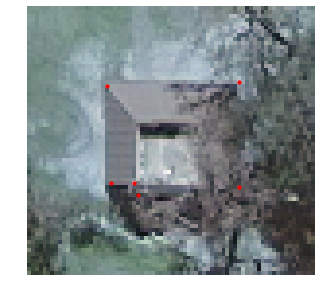

In [56]:
#Note the positions are based on the ground area and not strictly roof area.
generateDataBuilding(smoothContours[854], satImage, 20, '854', True)

# Creating a dataset

In [42]:
for index in range(len(smoothContours)):
    generateDataBuilding(smoothContours[index], satImage, 20, str(index), False)

Coordinates not valid
[[1829 4999]
 [1835 4999]]
Coordinates not valid
[[ 586 4997]
 [ 617 4998]]
Coordinates not valid
[[2929 4999]
 [2937 4999]
 [2931 4996]]
Coordinates not valid
[[1636 4999]
 [1645 4999]
 [1639 4996]]
Coordinates not valid
[[3679 4999]
 [3690 4999]
 [3683 4995]]
Coordinates not valid
[[2663 4997]
 [2675 4999]
 [2666 4995]]
Coordinates not valid
[[1115 4999]
 [1112 4994]
 [1102 4999]]
Coordinates not valid
[[3652 4999]
 [3671 4997]
 [3656 4989]]
Coordinates not valid
[[2298 4998]
 [2328 4999]
 [2306 4987]]
Coordinates not valid
[[3708 4993]
 [3711 4996]
 [3709 4999]
 [3742 4999]
 [3716 4986]]
Coordinates not valid
[[2973 4999]
 [2999 4999]
 [2992 4995]
 [2993 4992]
 [2981 4986]]
Coordinates not valid
[[2380 4999]
 [2397 4999]
 [2399 4991]
 [2388 4986]]
Coordinates not valid
[[3392 4995]
 [3396 4999]
 [3424 4999]
 [3398 4984]]
Coordinates not valid
[[1342 4999]
 [1367 4999]
 [1369 4994]
 [1351 4984]]
Coordinates not valid
[[3029 4999]
 [3075 4997]
 [3052 4985]
 [3048

./data/genTrain/austin10/162.txt
./data/genTrain/austin10/163.txt
./data/genTrain/austin10/164.txt
./data/genTrain/austin10/165.txt
./data/genTrain/austin10/166.txt
./data/genTrain/austin10/167.txt
./data/genTrain/austin10/168.txt
./data/genTrain/austin10/169.txt
./data/genTrain/austin10/170.txt
./data/genTrain/austin10/171.txt
./data/genTrain/austin10/172.txt
./data/genTrain/austin10/173.txt
./data/genTrain/austin10/174.txt
./data/genTrain/austin10/175.txt
./data/genTrain/austin10/176.txt
./data/genTrain/austin10/177.txt
./data/genTrain/austin10/178.txt
./data/genTrain/austin10/179.txt
./data/genTrain/austin10/180.txt
./data/genTrain/austin10/181.txt
./data/genTrain/austin10/182.txt
./data/genTrain/austin10/183.txt
./data/genTrain/austin10/184.txt
./data/genTrain/austin10/185.txt
./data/genTrain/austin10/186.txt
./data/genTrain/austin10/187.txt
./data/genTrain/austin10/188.txt
./data/genTrain/austin10/189.txt
./data/genTrain/austin10/190.txt
./data/genTrain/austin10/191.txt
Coordinate

./data/genTrain/austin10/403.txt
./data/genTrain/austin10/404.txt
./data/genTrain/austin10/405.txt
./data/genTrain/austin10/406.txt
./data/genTrain/austin10/407.txt
./data/genTrain/austin10/408.txt
./data/genTrain/austin10/409.txt
./data/genTrain/austin10/410.txt
./data/genTrain/austin10/411.txt
./data/genTrain/austin10/412.txt
./data/genTrain/austin10/413.txt
./data/genTrain/austin10/414.txt
./data/genTrain/austin10/415.txt
./data/genTrain/austin10/416.txt
./data/genTrain/austin10/417.txt
./data/genTrain/austin10/418.txt
./data/genTrain/austin10/419.txt
./data/genTrain/austin10/420.txt
./data/genTrain/austin10/421.txt
./data/genTrain/austin10/422.txt
./data/genTrain/austin10/423.txt
./data/genTrain/austin10/424.txt
./data/genTrain/austin10/425.txt
Coordinates not valid
[[   0 4219]
 [   0 4257]
 [  14 4256]
 [  17 4245]
 [  16 4227]
 [  11 4226]
 [  10 4218]]
./data/genTrain/austin10/427.txt
./data/genTrain/austin10/428.txt
./data/genTrain/austin10/429.txt
./data/genTrain/austin10/430

./data/genTrain/austin10/633.txt
Coordinates not valid
[[  59 3685]
 [   0 3731]
 [   0 3746]
 [   3 3750]
 [   8 3749]
 [  70 3700]]
./data/genTrain/austin10/635.txt
./data/genTrain/austin10/636.txt
./data/genTrain/austin10/637.txt
Coordinates not valid
[[   3 3674]
 [   0 3675]
 [   0 3699]
 [  14 3688]]
./data/genTrain/austin10/639.txt
./data/genTrain/austin10/640.txt
./data/genTrain/austin10/641.txt
./data/genTrain/austin10/642.txt
./data/genTrain/austin10/643.txt
./data/genTrain/austin10/644.txt
./data/genTrain/austin10/645.txt
./data/genTrain/austin10/646.txt
./data/genTrain/austin10/647.txt
./data/genTrain/austin10/648.txt
./data/genTrain/austin10/649.txt
./data/genTrain/austin10/650.txt
./data/genTrain/austin10/651.txt
./data/genTrain/austin10/652.txt
./data/genTrain/austin10/653.txt
./data/genTrain/austin10/654.txt
./data/genTrain/austin10/655.txt
./data/genTrain/austin10/656.txt
./data/genTrain/austin10/657.txt
./data/genTrain/austin10/658.txt
./data/genTrain/austin10/659.txt

./data/genTrain/austin10/849.txt
./data/genTrain/austin10/850.txt
./data/genTrain/austin10/851.txt
./data/genTrain/austin10/852.txt
./data/genTrain/austin10/853.txt
./data/genTrain/austin10/854.txt
./data/genTrain/austin10/855.txt
./data/genTrain/austin10/856.txt
./data/genTrain/austin10/857.txt
./data/genTrain/austin10/858.txt
./data/genTrain/austin10/859.txt
./data/genTrain/austin10/860.txt
./data/genTrain/austin10/861.txt
./data/genTrain/austin10/862.txt
./data/genTrain/austin10/863.txt
./data/genTrain/austin10/864.txt
./data/genTrain/austin10/865.txt
./data/genTrain/austin10/866.txt
./data/genTrain/austin10/867.txt
./data/genTrain/austin10/868.txt
./data/genTrain/austin10/869.txt
./data/genTrain/austin10/870.txt
./data/genTrain/austin10/871.txt
./data/genTrain/austin10/872.txt
./data/genTrain/austin10/873.txt
./data/genTrain/austin10/874.txt
./data/genTrain/austin10/875.txt
./data/genTrain/austin10/876.txt
./data/genTrain/austin10/877.txt
./data/genTrain/austin10/878.txt
./data/gen